In [ ]:
%sql
SELECT * FROM `hive_metastore`.`default`.`e_commerce_dataset`LIMIT 10;

Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Date_Standardized
2018-01-02,2025-02-08T10:56:33Z,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,2018-01-02
2018-07-24,2025-02-08T20:41:37Z,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,2018-07-24
2018-11-08,2025-02-08T08:38:49Z,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,2018-11-08
2018-04-18,2025-02-08T19:28:06Z,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,2018-04-18
2018-08-13,2025-02-08T21:18:39Z,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,2018-08-13
2018-07-09,2025-02-08T21:57:05Z,8.0,39783,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,1.0,0.3,24.0,2.4,Critical,credit_card,2018-07-09
2018-05-16,2025-02-08T13:10:30Z,1.0,26767,Female,Web,Member,Auto & Accessories,Car Mat,54.0,1.0,0.3,54.0,5.4,High,credit_card,2018-05-16
2018-06-23,2025-02-08T18:29:09Z,7.0,20719,Female,Web,Member,Auto & Accessories,Car Seat Covers,114.0,5.0,0.2,22.6,2.3,Critical,credit_card,2018-06-23
2018-07-29,2025-02-08T11:55:02Z,7.0,46947,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,116.4,11.6,Critical,credit_card,2018-07-29
2018-05-16,2025-02-08T19:41:10Z,10.0,31839,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.2,54.4,5.4,Critical,money_order,2018-05-16


In [ ]:
from pyspark.sql.functions import col

In [ ]:
# Load the data into a DataFrame
df = spark.read.table("hive_metastore.default.e_commerce_dataset")
df

DataFrame[Order_Date: date, Time: timestamp, Aging: double, Customer_Id: bigint, Gender: string, Device_Type: string, Customer_Login_type: string, Product_Category: string, Product: string, Sales: double, Quantity: double, Discount: double, Profit: double, Shipping_Cost: double, Order_Priority: string, Payment_method: string, Order_Date_Standardized: date]

In [ ]:
# Define partition columns
partition_columns = ["Order_Date", "Product_Category"]

# Write the partitioned table back to Hive metastore
df.write.mode("overwrite").partitionBy(*partition_columns).format("parquet").saveAsTable("hive_metastore.default.e_commerce_partitioned")

print("Partitioning completed successfully.")

---------------------------------------------------------------------------
SparkRuntimeException                     Traceback (most recent call last)
File <command-5934850968746440>, line 5
      2 partition_columns = ["Order_Date", "Product_Category"]
      4 # Write the partitioned table back to Hive metastore
----> 5 df.write.mode("overwrite").partitionBy(*partition_columns).format("parquet").saveAsTable("hive_metastore.default.e_commerce_partitioned")
      7 print("Partitioning completed successfully.")

File /databricks/spark/python/pyspark/instrumentation_utils.py:47, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     45 start = time.perf_counter()
     46 try:
---> 47     res = func(*args, **kwargs)
     48     logger.log_success(
     49         module_name, class_name, function_name, time.perf_counter() - start, signature
     50     )
     51     return res

File /databricks/spark/python/pyspark/sql/readwriter.py:1855, in DataFrameWriter.saveAsTable(self, name, forma

In [ ]:
# Display the schema of the partitioned table
df.printSchema()

root
 |-- Order_Date: date (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Aging: double (nullable = true)
 |-- Customer_Id: long (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Device_Type: string (nullable = true)
 |-- Customer_Login_type: string (nullable = true)
 |-- Product_Category: string (nullable = true)
 |-- Product: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: double (nullable = true)
 |-- Shipping_Cost: double (nullable = true)
 |-- Order_Priority: string (nullable = true)
 |-- Payment_method: string (nullable = true)
 |-- Order_Date_Standardized: date (nullable = true)



In [ ]:
%sql
DESCRIBE FORMATTED `hive_metastore`.`default`.`e_commerce_dataset`;

col_name,data_type,comment
Order_Date,date,null
Time,timestamp,null
Aging,double,null
Customer_Id,bigint,null
Gender,string,null
Device_Type,string,null
Customer_Login_type,string,null
Product_Category,string,null
Product,string,null
Sales,double,null


In [ ]:
%sql
SELECT COUNT(*) AS total_records FROM `hive_metastore`.`default`.`e_commerce_dataset`;

total_records
51290


In [ ]:
%sql
SELECT 
    COUNT(*) AS total_records,
    SUM(CASE WHEN Order_Date IS NULL THEN 1 ELSE 0 END) AS missing_Order_Date,
    SUM(CASE WHEN Customer_id IS NULL THEN 1 ELSE 0 END) AS missing_Customer_id,
    SUM(CASE WHEN Gender IS NULL THEN 1 ELSE 0 END) AS missing_Gender,
    SUM(CASE WHEN Product_Category IS NULL THEN 1 ELSE 0 END) AS missing_Product_Category
FROM `hive_metastore`.`default`.`e_commerce_dataset`;

total_records,missing_Order_Date,missing_Customer_id,missing_Gender,missing_Product_Category
51290,0,0,0,0


In [ ]:
%sql
SELECT 
    MIN(Sales) AS min_sales, 
    MAX(Sales) AS max_sales, 
    AVG(Sales) AS avg_sales, 
    MIN(Profit) AS min_profit, 
    MAX(Profit) AS max_profit, 
    AVG(Profit) AS avg_profit
FROM `hive_metastore`.`default`.`e_commerce_dataset`;

min_sales,max_sales,avg_sales,min_profit,max_profit,avg_profit
33.0,250.0,152.34087231180175,0.5,167.5,70.40722558003488


In [ ]:
%sql
SELECT Device_Type, COUNT(*) AS order_count 
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Device_Type
ORDER BY order_count DESC;

Device_Type,order_count
Web,47632
Mobile,3658


In [ ]:
%sql
SELECT Product_Category, SUM(Quantity) AS total_quantity_sold 
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Product_Category
ORDER BY total_quantity_sold DESC
LIMIT 5;

Product_Category,total_quantity_sold
Fashion,66639.0
Home & Furniture,38190.0
Auto & Accessories,17593.0
Electronic,5951.0


In [ ]:
%sql
SELECT Order_Date, SUM(Sales) AS total_sales
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Order_Date
ORDER BY Order_Date ASC;

In [ ]:
%sql
SELECT Product_Category, SUM(Profit) AS total_profit
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Product_Category
ORDER BY total_profit DESC;

Product_Category,total_profit
Fashion,2072623.9000000951
Home & Furniture,880058.9000000106
Auto & Accessories,484313.1999999963
Electronic,174190.60000000143


In [ ]:
%sql
SELECT Order_Priority, COUNT(*) AS order_count
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Order_Priority
ORDER BY order_count DESC;

Order_Priority,order_count
Medium,29433
High,15499
Critical,3932
Low,2424
null,2


In [ ]:
%sql
SELECT Payment_method, COUNT(*) AS payment_count
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Payment_method
ORDER BY payment_count DESC;

Payment_method,payment_count
credit_card,38137
money_order,9629
e_wallet,2789
debit_card,734
not_defined,1


In [ ]:
%sql
SELECT 
    COUNT(*) AS total_records,
    AVG(Sales) AS avg_sales,
    STDDEV(Sales) AS std_sales,
    MIN(Sales) AS min_sales,
    MAX(Sales) AS max_sales,
    
    AVG(Quantity) AS avg_quantity,
    STDDEV(Quantity) AS std_quantity,
    MIN(Quantity) AS min_quantity,
    MAX(Quantity) AS max_quantity,
    
    AVG(Discount) AS avg_discount,
    STDDEV(Discount) AS std_discount,
    MIN(Discount) AS min_discount,
    MAX(Discount) AS max_discount,
    
    AVG(Profit) AS avg_profit,
    STDDEV(Profit) AS std_profit,
    MIN(Profit) AS min_profit,
    MAX(Profit) AS max_profit,
    
    AVG(Shipping_cost) AS avg_shipping_cost,
    STDDEV(Shipping_cost) AS std_shipping_cost,
    MIN(Shipping_cost) AS min_shipping_cost,
    MAX(Shipping_cost) AS max_shipping_cost,
    
    AVG(Aging) AS avg_aging,
    STDDEV(Aging) AS std_aging,
    MIN(Aging) AS min_aging,
    MAX(Aging) AS max_aging

FROM `hive_metastore`.`default`.`e_commerce_dataset`;

total_records,avg_sales,std_sales,min_sales,max_sales,avg_quantity,std_quantity,min_quantity,max_quantity,avg_discount,std_discount,min_discount,max_discount,avg_profit,std_profit,min_profit,max_profit,avg_shipping_cost,std_shipping_cost,min_shipping_cost,max_shipping_cost,avg_aging,std_aging,min_aging,max_aging
51290,152.34087231180175,66.49541941735221,33.0,250.0,2.5029831539541414,1.5118586336411253,1.0,5.0,0.3038214821891464,0.13102661107663202,0.1,0.5,70.40722558003488,48.72948829951265,0.5,167.5,7.041556669071595,4.871744672835287,0.1,16.8,5.255035192731385,2.959948361375533,1.0,10.5


In [ ]:
# Load the dataset
df = spark.read.table("hive_metastore.default.e_commerce_dataset")

# Describe numerical columns
numerical_columns = ["Sales", "Quantity", "Discount", "Profit", "Shipping_cost", "Aging"]

# Generate summary statistics
df.select(numerical_columns).describe().show()

+-------+------------------+------------------+-------------------+-----------------+-----------------+-----------------+
|summary|             Sales|          Quantity|           Discount|           Profit|    Shipping_cost|            Aging|
+-------+------------------+------------------+-------------------+-----------------+-----------------+-----------------+
|  count|             51289|             51288|              51289|            51290|            51289|            51289|
|   mean|152.34087231180175|2.5029831539541414| 0.3038214821891464|70.40722558003488|7.041556669071595|5.255035192731385|
| stddev| 66.49541941735221|1.5118586336411253|0.13102661107663202|48.72948829951265|4.871744672835287|2.959948361375533|
|    min|              33.0|               1.0|                0.1|              0.5|              0.1|              1.0|
|    max|             250.0|               5.0|                0.5|            167.5|             16.8|             10.5|
+-------+---------------

In [ ]:
# Load dataset
df = spark.read.table("hive_metastore.default.e_commerce_dataset")

# List of categorical columns
categorical_columns = ["Gender", "Device_Type", "Customer_Login_Type", "Product_Category", "Order_Priority", "Payment_method"]

# Display unique value counts for each categorical column
for col_name in categorical_columns:
    print(f"Distribution for {col_name}:")
    df.groupBy(col_name).count().orderBy("count", ascending=False).show()

Distribution for Gender:
+------+-----+
|Gender|count|
+------+-----+
|  Male|28138|
|Female|23152|
+------+-----+

Distribution for Device_Type:
+-----------+-----+
|Device_Type|count|
+-----------+-----+
|        Web|47632|
|     Mobile| 3658|
+-----------+-----+

Distribution for Customer_Login_Type:
+-------------------+-----+
|Customer_Login_Type|count|
+-------------------+-----+
|             Member|49097|
|              Guest| 1993|
|       First SignUp|  173|
|               New |   27|
+-------------------+-----+

Distribution for Product_Category:
+------------------+-----+
|  Product_Category|count|
+------------------+-----+
|           Fashion|25646|
|  Home & Furniture|15438|
|Auto & Accessories| 7505|
|        Electronic| 2701|
+------------------+-----+

Distribution for Order_Priority:
+--------------+-----+
|Order_Priority|count|
+--------------+-----+
|        Medium|29433|
|          High|15499|
|      Critical| 3932|
|           Low| 2424|
|          NULL|    2|
+

In [ ]:
%sql
SELECT Gender, COUNT(*) AS count
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Gender
ORDER BY count DESC;

Gender,count
Male,28138
Female,23152


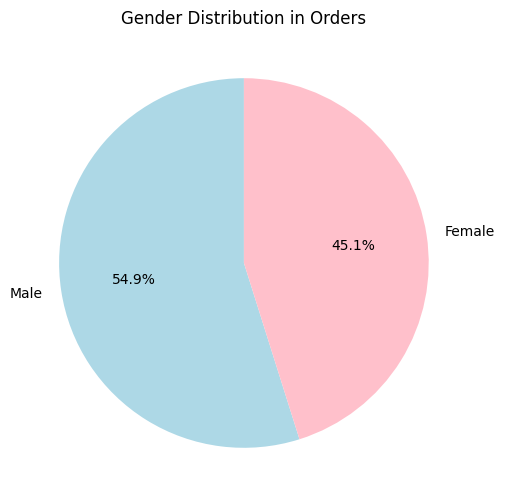

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Male', 'Female']
sizes = [28138, 23152]
colors = ['lightblue', 'pink']

# Create Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Gender Distribution in Orders")
plt.show()


In [ ]:
%sql
SELECT Device_Type, COUNT(*) AS count
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Device_Type
ORDER BY count DESC;

Device_Type,count
Web,47632
Mobile,3658


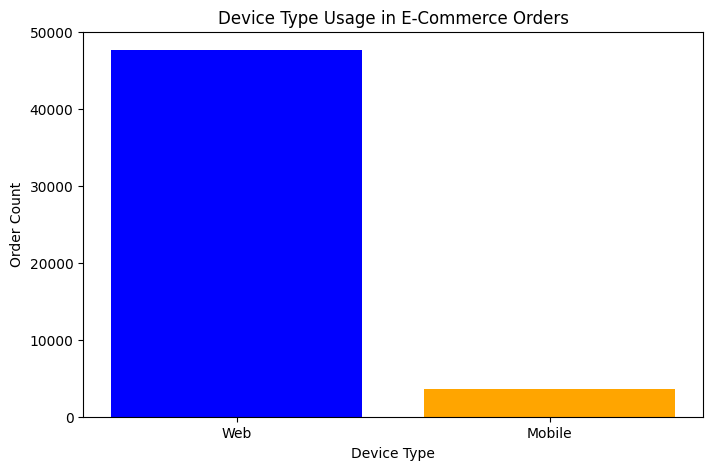

In [ ]:
import matplotlib.pyplot as plt

# Data
device_types = ["Web", "Mobile"]
order_counts = [47632, 3658]

# Create Bar Chart
plt.figure(figsize=(8,5))
plt.bar(device_types, order_counts, color=['blue', 'orange'])
plt.xlabel("Device Type")
plt.ylabel("Order Count")
plt.title("Device Type Usage in E-Commerce Orders")
plt.show()


In [ ]:
%sql
SELECT Customer_Login_Type, COUNT(*) AS count
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Customer_Login_Type
ORDER BY count DESC;

Customer_Login_Type,count
Member,49097
Guest,1993
First SignUp,173
New,27


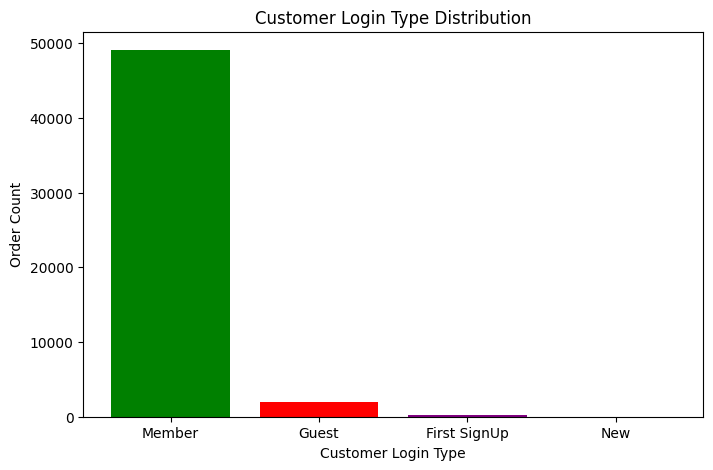

In [ ]:
# Data
login_types = ["Member", "Guest", "First SignUp", "New"]
counts = [49097, 1993, 173, 27]

# Create Bar Chart
plt.figure(figsize=(8,5))
plt.bar(login_types, counts, color=['green', 'red', 'purple', 'cyan'])
plt.xlabel("Customer Login Type")
plt.ylabel("Order Count")
plt.title("Customer Login Type Distribution")
plt.show()


In [ ]:
%sql
SELECT Product_Category, COUNT(*) AS order_count
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Product_Category
ORDER BY order_count DESC
LIMIT 5;

Product_Category,order_count
Fashion,25646
Home & Furniture,15438
Auto & Accessories,7505
Electronic,2701


In [ ]:
%sql
SELECT Order_Priority, COUNT(*) AS count
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Order_Priority
ORDER BY count DESC;

Order_Priority,count
Medium,29433
High,15499
Critical,3932
Low,2424
null,2


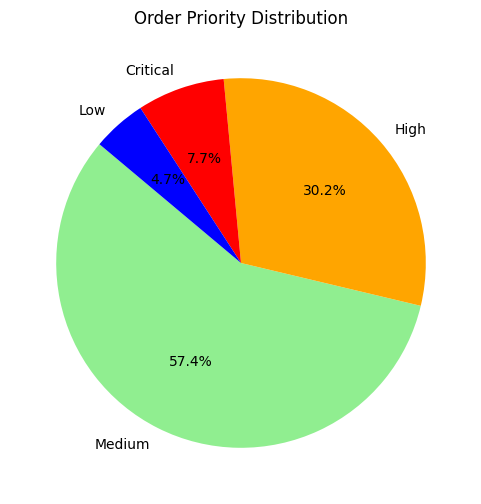

In [ ]:
# Data
labels = ["Medium", "High", "Critical", "Low"]
sizes = [29433, 15499, 3932, 2424]
colors = ['lightgreen', 'orange', 'red', 'blue']

# Create Pie Chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Order Priority Distribution")
plt.show()


In [ ]:
%sql
SELECT Payment_method, COUNT(*) AS count
FROM `hive_metastore`.`default`.`e_commerce_dataset`
GROUP BY Payment_method
ORDER BY count DESC;

Payment_method,count
credit_card,38137
money_order,9629
e_wallet,2789
debit_card,734
not_defined,1


In [ ]:
from pyspark.sql.functions import col, sum

# Load dataset
df = spark.read.table("hive_metastore.default.e_commerce_dataset")

# Count missing values for each column
missing_values = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_values.show()

+----------+----+-----+-----------+------+-----------+-------------------+----------------+-------+-----+--------+--------+------+-------------+--------------+--------------+
|Order_Date|Time|Aging|Customer_Id|Gender|Device_Type|Customer_Login_type|Product_Category|Product|Sales|Quantity|Discount|Profit|Shipping_Cost|Order_Priority|Payment_method|
+----------+----+-----+-----------+------+-----------+-------------------+----------------+-------+-----+--------+--------+------+-------------+--------------+--------------+
|         0|   0|    1|          0|     0|          0|                  0|               0|      0|    1|       2|       1|     0|            1|             2|             0|
+----------+----+-----+-----------+------+-----------+-------------------+----------------+-------+-----+--------+--------+------+-------------+--------------+--------------+



In [ ]:
%sql
SELECT 
    SUM(CASE WHEN Order_Date IS NULL THEN 1 ELSE 0 END) AS missing_Order_Date,
    SUM(CASE WHEN Customer_id IS NULL THEN 1 ELSE 0 END) AS missing_Customer_id,
    SUM(CASE WHEN Gender IS NULL THEN 1 ELSE 0 END) AS missing_Gender,
    SUM(CASE WHEN Product_Category IS NULL THEN 1 ELSE 0 END) AS missing_Product_Category,
    SUM(CASE WHEN Sales IS NULL THEN 1 ELSE 0 END) AS missing_Sales
FROM `hive_metastore`.`default`.`e_commerce_dataset`;

missing_Order_Date,missing_Customer_id,missing_Gender,missing_Product_Category,missing_Sales
0,0,0,0,1


In [ ]:
df_cleaned = df.na.drop()
df_cleaned.show()

+----------+-------------------+-----+-----------+------+-----------+-------------------+------------------+--------------------+-----+--------+--------+------+-------------+--------------+--------------+
|Order_Date|               Time|Aging|Customer_Id|Gender|Device_Type|Customer_Login_type|  Product_Category|             Product|Sales|Quantity|Discount|Profit|Shipping_Cost|Order_Priority|Payment_method|
+----------+-------------------+-----+-----------+------+-----------+-------------------+------------------+--------------------+-----+--------+--------+------+-------------+--------------+--------------+
|2018-01-02|2025-02-08 10:56:33|  8.0|      37077|Female|        Web|             Member|Auto & Accessories|   Car Media Players|140.0|     1.0|     0.3|  46.0|          4.6|        Medium|   credit_card|
|2018-07-24|2025-02-08 20:41:37|  2.0|      59173|Female|        Web|             Member|Auto & Accessories|        Car Speakers|211.0|     1.0|     0.3| 112.0|         11.2|      

In [ ]:
df_filled = df.fillna({"Sales": 0, "Profit": df.selectExpr("avg(Profit)").collect()[0][0]})
df_filled.show()

+----------+-------------------+-----+-----------+------+-----------+-------------------+------------------+--------------------+-----+--------+--------+------+-------------+--------------+--------------+
|Order_Date|               Time|Aging|Customer_Id|Gender|Device_Type|Customer_Login_type|  Product_Category|             Product|Sales|Quantity|Discount|Profit|Shipping_Cost|Order_Priority|Payment_method|
+----------+-------------------+-----+-----------+------+-----------+-------------------+------------------+--------------------+-----+--------+--------+------+-------------+--------------+--------------+
|2018-01-02|2025-02-08 10:56:33|  8.0|      37077|Female|        Web|             Member|Auto & Accessories|   Car Media Players|140.0|     1.0|     0.3|  46.0|          4.6|        Medium|   credit_card|
|2018-07-24|2025-02-08 20:41:37|  2.0|      59173|Female|        Web|             Member|Auto & Accessories|        Car Speakers|211.0|     1.0|     0.3| 112.0|         11.2|      

In [ ]:
df_filled = df.fillna({"Gender": "Unknown", "Product_Category": "Other"})
df_filled.show()

+----------+-------------------+-----+-----------+------+-----------+-------------------+------------------+--------------------+-----+--------+--------+------+-------------+--------------+--------------+
|Order_Date|               Time|Aging|Customer_Id|Gender|Device_Type|Customer_Login_type|  Product_Category|             Product|Sales|Quantity|Discount|Profit|Shipping_Cost|Order_Priority|Payment_method|
+----------+-------------------+-----+-----------+------+-----------+-------------------+------------------+--------------------+-----+--------+--------+------+-------------+--------------+--------------+
|2018-01-02|2025-02-08 10:56:33|  8.0|      37077|Female|        Web|             Member|Auto & Accessories|   Car Media Players|140.0|     1.0|     0.3|  46.0|          4.6|        Medium|   credit_card|
|2018-07-24|2025-02-08 20:41:37|  2.0|      59173|Female|        Web|             Member|Auto & Accessories|        Car Speakers|211.0|     1.0|     0.3| 112.0|         11.2|      

In [ ]:
%sql
SELECT 
    Customer_id,
    COALESCE(Gender, 'Unknown') AS Gender,
    COALESCE(Product_Category, 'Other') AS Product_Category,
    COALESCE(Sales, 0) AS Sales,
    COALESCE(Profit, (SELECT AVG(Profit) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) AS Profit
FROM `hive_metastore`.`default`.`e_commerce_dataset`;

In [ ]:
%sql
CREATE TABLE IF NOT EXISTS `hive_metastore`.`default`.`e_commerce_cleaned` AS
SELECT 
    Customer_id,
    COALESCE(Gender, 'Unknown') AS Gender,
    COALESCE(Product_Category, 'Other') AS Product_Category,
    COALESCE(Sales, 0) AS Sales,
    COALESCE(Profit, (SELECT AVG(Profit) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) AS Profit
FROM `hive_metastore`.`default`.`e_commerce_dataset`;

num_affected_rows,num_inserted_rows


In [ ]:
%sql
SELECT 'Before Cleaning' AS State, COUNT(*) AS Total_Records, 
    SUM(CASE WHEN Sales IS NULL THEN 1 ELSE 0 END) AS Missing_Sales,
    SUM(CASE WHEN Profit IS NULL THEN 1 ELSE 0 END) AS Missing_Profit
FROM `hive_metastore`.`default`.`e_commerce_dataset`
UNION ALL
SELECT 'After Cleaning' AS State, COUNT(*) AS Total_Records, 
    SUM(CASE WHEN Sales IS NULL THEN 1 ELSE 0 END) AS Missing_Sales,
    SUM(CASE WHEN Profit IS NULL THEN 1 ELSE 0 END) AS Missing_Profit
FROM `hive_metastore`.`default`.`e_commerce_cleaned`;

State,Total_Records,Missing_Sales,Missing_Profit
Before Cleaning,51290,1,0
After Cleaning,51290,0,0


In [ ]:
%sql
SELECT *, CAST(Order_Date AS DATE) AS Order_Date_Formatted
FROM `hive_metastore`.`default`.`e_commerce_dataset`limit 10;

Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Date_Standardized,Order_Date_Formatted
2018-01-02,2025-02-08T10:56:33Z,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,2018-01-02,2018-01-02
2018-07-24,2025-02-08T20:41:37Z,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,2018-07-24,2018-07-24
2018-11-08,2025-02-08T08:38:49Z,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,2018-11-08,2018-11-08
2018-04-18,2025-02-08T19:28:06Z,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,2018-04-18,2018-04-18
2018-08-13,2025-02-08T21:18:39Z,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,2018-08-13,2018-08-13
2018-07-09,2025-02-08T21:57:05Z,8.0,39783,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,1.0,0.3,24.0,2.4,Critical,credit_card,2018-07-09,2018-07-09
2018-05-16,2025-02-08T13:10:30Z,1.0,26767,Female,Web,Member,Auto & Accessories,Car Mat,54.0,1.0,0.3,54.0,5.4,High,credit_card,2018-05-16,2018-05-16
2018-06-23,2025-02-08T18:29:09Z,7.0,20719,Female,Web,Member,Auto & Accessories,Car Seat Covers,114.0,5.0,0.2,22.6,2.3,Critical,credit_card,2018-06-23,2018-06-23
2018-07-29,2025-02-08T11:55:02Z,7.0,46947,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,116.4,11.6,Critical,credit_card,2018-07-29,2018-07-29
2018-05-16,2025-02-08T19:41:10Z,10.0,31839,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.2,54.4,5.4,Critical,money_order,2018-05-16,2018-05-16


In [ ]:
%sql
SELECT *, 
    YEAR(Order_Date) AS Order_Year,
    MONTH(Order_Date) AS Order_Month,
    DAY(Order_Date) AS Order_Day
FROM `hive_metastore`.`default`.`e_commerce_dataset`limit 10;

Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Date_Standardized,Order_Year,Order_Month,Order_Day
2018-01-02,2025-02-08T10:56:33Z,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,2018-01-02,2018,1,2
2018-07-24,2025-02-08T20:41:37Z,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,2018-07-24,2018,7,24
2018-11-08,2025-02-08T08:38:49Z,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,2018-11-08,2018,11,8
2018-04-18,2025-02-08T19:28:06Z,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,2018-04-18,2018,4,18
2018-08-13,2025-02-08T21:18:39Z,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,2018-08-13,2018,8,13
2018-07-09,2025-02-08T21:57:05Z,8.0,39783,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,1.0,0.3,24.0,2.4,Critical,credit_card,2018-07-09,2018,7,9
2018-05-16,2025-02-08T13:10:30Z,1.0,26767,Female,Web,Member,Auto & Accessories,Car Mat,54.0,1.0,0.3,54.0,5.4,High,credit_card,2018-05-16,2018,5,16
2018-06-23,2025-02-08T18:29:09Z,7.0,20719,Female,Web,Member,Auto & Accessories,Car Seat Covers,114.0,5.0,0.2,22.6,2.3,Critical,credit_card,2018-06-23,2018,6,23
2018-07-29,2025-02-08T11:55:02Z,7.0,46947,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,116.4,11.6,Critical,credit_card,2018-07-29,2018,7,29
2018-05-16,2025-02-08T19:41:10Z,10.0,31839,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.2,54.4,5.4,Critical,money_order,2018-05-16,2018,5,16


In [ ]:
%sql
SELECT *, 
    CASE 
        WHEN Sales > 0 THEN (Profit / Sales) * 100 
        ELSE 0 
    END AS Profit_Margin
FROM `hive_metastore`.`default`.`e_commerce_dataset`limit 10;

Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Date_Standardized,Profit_Margin
2018-01-02,2025-02-08T10:56:33Z,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,2018-01-02,32.857142857142854
2018-07-24,2025-02-08T20:41:37Z,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,2018-07-24,53.08056872037915
2018-11-08,2025-02-08T08:38:49Z,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,2018-11-08,26.666666666666668
2018-04-18,2025-02-08T19:28:06Z,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,2018-04-18,22.203389830508474
2018-08-13,2025-02-08T21:18:39Z,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,2018-08-13,64.0
2018-07-09,2025-02-08T21:57:05Z,8.0,39783,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,1.0,0.3,24.0,2.4,Critical,credit_card,2018-07-09,33.33333333333333
2018-05-16,2025-02-08T13:10:30Z,1.0,26767,Female,Web,Member,Auto & Accessories,Car Mat,54.0,1.0,0.3,54.0,5.4,High,credit_card,2018-05-16,100.0
2018-06-23,2025-02-08T18:29:09Z,7.0,20719,Female,Web,Member,Auto & Accessories,Car Seat Covers,114.0,5.0,0.2,22.6,2.3,Critical,credit_card,2018-06-23,19.824561403508774
2018-07-29,2025-02-08T11:55:02Z,7.0,46947,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,116.4,11.6,Critical,credit_card,2018-07-29,50.3896103896104
2018-05-16,2025-02-08T19:41:10Z,10.0,31839,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.2,54.4,5.4,Critical,money_order,2018-05-16,38.857142857142854


In [ ]:
%sql
SELECT *, 
    CASE 
        WHEN Sales < 50 THEN 'Low'
        WHEN Sales BETWEEN 50 AND 200 THEN 'Medium'
        ELSE 'High'
    END AS Sales_Category
FROM `hive_metastore`.`default`.`e_commerce_dataset`limit 10;


Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method,Order_Date_Standardized,Sales_Category
2018-01-02,2025-02-08T10:56:33Z,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card,2018-01-02,Medium
2018-07-24,2025-02-08T20:41:37Z,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card,2018-07-24,High
2018-11-08,2025-02-08T08:38:49Z,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card,2018-11-08,Medium
2018-04-18,2025-02-08T19:28:06Z,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card,2018-04-18,Medium
2018-08-13,2025-02-08T21:18:39Z,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card,2018-08-13,High
2018-07-09,2025-02-08T21:57:05Z,8.0,39783,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,1.0,0.3,24.0,2.4,Critical,credit_card,2018-07-09,Medium
2018-05-16,2025-02-08T13:10:30Z,1.0,26767,Female,Web,Member,Auto & Accessories,Car Mat,54.0,1.0,0.3,54.0,5.4,High,credit_card,2018-05-16,Medium
2018-06-23,2025-02-08T18:29:09Z,7.0,20719,Female,Web,Member,Auto & Accessories,Car Seat Covers,114.0,5.0,0.2,22.6,2.3,Critical,credit_card,2018-06-23,Medium
2018-07-29,2025-02-08T11:55:02Z,7.0,46947,Female,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.3,116.4,11.6,Critical,credit_card,2018-07-29,High
2018-05-16,2025-02-08T19:41:10Z,10.0,31839,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.2,54.4,5.4,Critical,money_order,2018-05-16,Medium


In [ ]:
%sql
CREATE TABLE IF NOT EXISTS `hive_metastore`.`default`.`e_commerce_transformed` AS
SELECT 
    Customer_id,
    COALESCE(Gender, 'Unknown') AS Gender,
    COALESCE(Product_Category, 'Other') AS Product_Category,
    COALESCE(Sales, 0) AS Sales,
    COALESCE(Profit, (SELECT AVG(Profit) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) AS Profit,
    CAST(Order_Date AS DATE) AS Order_Date_Formatted,
    YEAR(Order_Date) AS Order_Year,
    MONTH(Order_Date) AS Order_Month,
    DAY(Order_Date) AS Order_Day,
    CASE WHEN Sales > 0 THEN (Profit / Sales) * 100 ELSE 0 END AS Profit_Margin,
    CASE 
        WHEN Sales < 50 THEN 'Low'
        WHEN Sales BETWEEN 50 AND 200 THEN 'Medium'
        ELSE 'High'
    END AS Sales_Category
FROM `hive_metastore`.`default`.`e_commerce_dataset`;

num_affected_rows,num_inserted_rows


In [ ]:
%sql
SELECT COUNT(*) AS total_records_after_transformation FROM `hive_metastore`.`default`.`e_commerce_transformed`;


total_records_after_transformation
51290


In [ ]:
%sql
SELECT 'Before Transformation' AS State, COUNT(*) AS Total_Records FROM `hive_metastore`.`default`.`e_commerce_dataset`
UNION ALL
SELECT 'After Transformation' AS State, COUNT(*) AS Total_Records FROM `hive_metastore`.`default`.`e_commerce_transformed`;


State,Total_Records
Before Transformation,51290
After Transformation,51290


In [ ]:
%sql
SELECT Order_Date, 
       CAST(Order_Date AS DATE) AS Order_Date_Standardized
FROM `hive_metastore`.`default`.`e_commerce_dataset`limit 10;


Order_Date,Order_Date_Standardized
2018-01-02,2018-01-02
2018-07-24,2018-07-24
2018-11-08,2018-11-08
2018-04-18,2018-04-18
2018-08-13,2018-08-13
2018-07-09,2018-07-09
2018-05-16,2018-05-16
2018-06-23,2018-06-23
2018-07-29,2018-07-29
2018-05-16,2018-05-16


In [ ]:
%sql
ALTER TABLE `hive_metastore`.`default`.`e_commerce_dataset`
ADD COLUMNS (Order_Date_Standardized DATE);


org.apache.spark.sql.catalyst.ExtendedAnalysisException: [FIELD_ALREADY_EXISTS] Cannot add column, because `Order_Date_Standardized` already exists in "STRUCT<Order_Date: DATE, Time: TIMESTAMP, Aging: DOUBLE, Customer_Id: BIGINT, Gender: STRING, Device_Type: STRING, Customer_Login_type: STRING, Product_Category: STRING, Product: STRING, Sales: DOUBLE, Quantity: DOUBLE, Discount: DOUBLE, Profit: DOUBLE, Shipping_Cost: DOUBLE, Order_Priority: STRING, Payment_method: STRING, Order_Date_Standardized: DATE>". SQLSTATE: 42710; line 1 pos 0;
AddColumns [QualifiedColType(None,Order_Date_Standardized,DateType,true,None,None,None,None)]
+- ResolvedTable com.databricks.sql.managedcatalog.UnityCatalogV2Proxy@4bb70bcf, default.e_commerce_dataset, DeltaTableV2(org.apache.spark.sql.SparkSession@7c300fac,dbfs:/user/hive/warehouse/e_commerce_dataset,Some(CatalogTable(
Catalog: hive_metastore
Database: default
Table: e_commerce_dataset
Owner: (Unknown)chowdarysujan27
Created Time: Sat Feb 08 16:55:22 UT

In [ ]:
%sql
UPDATE `hive_metastore`.`default`.`e_commerce_dataset`
SET Order_Date_Standardized = CAST(Order_Date AS DATE);


num_affected_rows
51290


In [ ]:
%sql
SELECT DISTINCT Order_Date_Standardized FROM `hive_metastore`.`default`.`e_commerce_dataset` LIMIT 10;


Order_Date_Standardized
2018-08-10
2018-05-28
2018-03-17
2018-06-06
2018-10-05
2018-09-09
2018-08-08
2018-08-11
2018-11-02
2018-09-01


In [ ]:
%python
from pyspark.sql.functions import col, to_date

df = df.withColumn("Order_Date_Standardized", to_date(col("Order_Date"), "yyyy-MM-dd"))

# Verify
df.select("Order_Date", "Order_Date_Standardized").show()

+----------+-----------------------+
|Order_Date|Order_Date_Standardized|
+----------+-----------------------+
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
|2018-04-24|             2018-04-24|
+----------+-----------------------+
only showing top 20 rows


In [ ]:
%sql
SELECT 
    Customer_Id,
    Order_Date,
    -- Gender Encoding
    CASE WHEN Gender = 'Male' THEN 1 ELSE 0 END AS Gender_Male,
    CASE WHEN Gender = 'Female' THEN 1 ELSE 0 END AS Gender_Female,

    -- Device Type Encoding
    CASE WHEN Device_Type = 'Web' THEN 1 ELSE 0 END AS Device_Web,
    CASE WHEN Device_Type = 'Mobile' THEN 1 ELSE 0 END AS Device_Mobile,

    -- Payment Method Encoding
    CASE WHEN Payment_Method = 'credit_card' THEN 1 ELSE 0 END AS Payment_CreditCard,
    CASE WHEN Payment_Method = 'debit_card' THEN 1 ELSE 0 END AS Payment_DebitCard,
    CASE WHEN Payment_Method = 'e_wallet' THEN 1 ELSE 0 END AS Payment_EWallet,

    -- Order Priority Encoding
    CASE WHEN Order_Priority = 'High' THEN 1 ELSE 0 END AS Order_High,
    CASE WHEN Order_Priority = 'Medium' THEN 1 ELSE 0 END AS Order_Medium,
    CASE WHEN Order_Priority = 'Low' THEN 1 ELSE 0 END AS Order_Low,
    CASE WHEN Order_Priority = 'Critical' THEN 1 ELSE 0 END AS Order_Critical

FROM `hive_metastore`.`default`.`e_commerce_dataset`LIMIT 10;


Customer_Id,Order_Date,Gender_Male,Gender_Female,Device_Web,Device_Mobile,Payment_CreditCard,Payment_DebitCard,Payment_EWallet,Order_High,Order_Medium,Order_Low,Order_Critical
37077,2018-01-02,0,1,1,0,1,0,0,0,1,0,0
59173,2018-07-24,0,1,1,0,1,0,0,0,1,0,0
41066,2018-11-08,0,1,1,0,1,0,0,0,0,0,1
50741,2018-04-18,0,1,1,0,1,0,0,1,0,0,0
53639,2018-08-13,0,1,1,0,1,0,0,0,0,0,1
39783,2018-07-09,0,1,1,0,1,0,0,0,0,0,1
26767,2018-05-16,0,1,1,0,1,0,0,1,0,0,0
20719,2018-06-23,0,1,1,0,1,0,0,0,0,0,1
46947,2018-07-29,0,1,1,0,1,0,0,0,0,0,1
31839,2018-05-16,0,1,1,0,0,0,0,0,0,0,1


In [ ]:
%sql
SELECT 'Before Encoding' AS State, COUNT(*) AS Total_Records FROM `hive_metastore`.`default`.`e_commerce_dataset`
UNION ALL
SELECT 'After Encoding' AS State, COUNT(*) AS Total_Records FROM `hive_metastore`.`default`.`e_commerce_encoded`;


State,Total_Records
Before Encoding,51290
After Encoding,51290


In [ ]:
%sql
SELECT 
    Customer_Id,
    Order_Date,
    
    -- Min-Max Normalization for Numerical Columns
    (Sales - (SELECT MIN(Sales) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) / 
    ((SELECT MAX(Sales) FROM `hive_metastore`.`default`.`e_commerce_dataset`) - 
    (SELECT MIN(Sales) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) AS Sales_Normalized,

    (Quantity - (SELECT MIN(Quantity) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) / 
    ((SELECT MAX(Quantity) FROM `hive_metastore`.`default`.`e_commerce_dataset`) - 
    (SELECT MIN(Quantity) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) AS Quantity_Normalized,

    (Discount - (SELECT MIN(Discount) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) / 
    ((SELECT MAX(Discount) FROM `hive_metastore`.`default`.`e_commerce_dataset`) - 
    (SELECT MIN(Discount) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) AS Discount_Normalized,

    (Profit - (SELECT MIN(Profit) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) / 
    ((SELECT MAX(Profit) FROM `hive_metastore`.`default`.`e_commerce_dataset`) - 
    (SELECT MIN(Profit) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) AS Profit_Normalized,

    (Shipping_Cost - (SELECT MIN(Shipping_Cost) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) / 
    ((SELECT MAX(Shipping_Cost) FROM `hive_metastore`.`default`.`e_commerce_dataset`) - 
    (SELECT MIN(Shipping_Cost) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) AS Shipping_Cost_Normalized,

    (Aging - (SELECT MIN(Aging) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) / 
    ((SELECT MAX(Aging) FROM `hive_metastore`.`default`.`e_commerce_dataset`) - 
    (SELECT MIN(Aging) FROM `hive_metastore`.`default`.`e_commerce_dataset`)) AS Aging_Normalized

FROM `hive_metastore`.`default`.`e_commerce_dataset`LIMIT 10;


Customer_Id,Order_Date,Sales_Normalized,Quantity_Normalized,Discount_Normalized,Profit_Normalized,Shipping_Cost_Normalized,Aging_Normalized
37077,2018-01-02,0.4930875576036866,0.0,0.49999999999999994,0.27245508982035926,0.2694610778443114,0.7368421052631579
59173,2018-07-24,0.8202764976958525,0.0,0.49999999999999994,0.6676646706586826,0.6646706586826348,0.10526315789473684
41066,2018-11-08,0.3870967741935484,1.0,0.0,0.18383233532934132,0.17964071856287425,0.7368421052631579
50741,2018-04-18,0.391705069124424,0.0,0.49999999999999994,0.15389221556886226,0.14970059880239522,0.631578947368421
53639,2018-08-13,1.0,0.0,0.49999999999999994,0.9550898203592815,0.9520958083832336,0.8421052631578947
39783,2018-07-09,0.17972350230414746,0.0,0.49999999999999994,0.1407185628742515,0.1377245508982036,0.7368421052631579
26767,2018-05-16,0.0967741935483871,0.0,0.49999999999999994,0.3203592814371258,0.3173652694610779,0.0
20719,2018-06-23,0.37327188940092165,1.0,0.25,0.13233532934131736,0.13173652694610777,0.631578947368421
46947,2018-07-29,0.9124423963133641,1.0,0.49999999999999994,0.6940119760479042,0.688622754491018,0.631578947368421
31839,2018-05-16,0.4930875576036866,0.0,0.25,0.32275449101796405,0.3173652694610779,0.9473684210526315


In [ ]:
from pyspark.sql.functions import col, min, max

# Load dataset
df = spark.read.table("hive_metastore.default.e_commerce_dataset")

# Calculate Min and Max for each column
min_max_values = df.agg(
    min("Sales").alias("min_sales"), max("Sales").alias("max_sales"),
    min("Quantity").alias("min_quantity"), max("Quantity").alias("max_quantity"),
    min("Discount").alias("min_discount"), max("Discount").alias("max_discount"),
    min("Profit").alias("min_profit"), max("Profit").alias("max_profit"),
    min("Shipping_Cost").alias("min_shipping"), max("Shipping_Cost").alias("max_shipping")
)

display(min_max_values)

min_sales,max_sales,min_quantity,max_quantity,min_discount,max_discount,min_profit,max_profit,min_shipping,max_shipping
33.0,250.0,1.0,5.0,0.1,0.5,0.5,167.5,0.1,16.8
